In [1]:
# Calcula la precipitacion mensual media para el periodo
# 1979 - 2020 en la Cuenca del Valle de México.

import pandas as pd
import xarray as xr

import matplotlib.pyplot as plt

In [2]:
path_cru = "../data/CRU/"
path_grid = "../results/"
fname_cru = "mexico_cru_ts4.05.1901.2020.pre.dat.nc"
fname_grid = "grid_points.csv"

# Se leen los límites de la cuenca.
df_grid = pd.read_csv(path_grid + fname_grid)
lon_i = df_grid.lonp.min()
lon_f = df_grid.lonp.max() + 1
lat_i = df_grid.latp.min()
lat_f = df_grid.latp.max() + 1

# Se carga la precipitación.
pre_xr = xr.load_dataset(path_cru + fname_cru)
# Se recorta la zona de estudio.
pre_xr = pre_xr[dict(lon = slice(lon_i, lon_f), lat = slice(lat_i, lat_f))]
# Se promedia espacialmente y se retira stn, que no se requiere.
pre_df = pre_xr.drop("stn").mean(dim = "lat").mean(
        dim = "lon").to_dataframe()

In [3]:
# Se verifica que se haya recortado la zona adecuada.

print(pre_xr.lat)
print(pre_xr.lon)

<xarray.DataArray 'lat' (lat: 3)>
array([18.75, 19.25, 19.75], dtype=float32)
Coordinates:
  * lat      (lat) float32 18.75 19.25 19.75
Attributes:
    long_name:  latitude
    units:      degrees_north
<xarray.DataArray 'lon' (lon: 2)>
array([-99.25, -98.75], dtype=float32)
Coordinates:
  * lon      (lon) float32 -99.25 -98.75
Attributes:
    long_name:  longitude
    units:      degrees_east


In [4]:
pre_xr.close()

In [5]:
# Se seleccionan los datos a partir de 1979.
pre_df = pre_df[pre_df.index > "1979"]
# Se obtienen los nombres de los meses.
pre_df["Mes"] = pre_df.index.month_name("es_MX")
# Se cambia el formato del índice para que no incluya el día.
pre_df.index = pre_df.index.to_period("M")

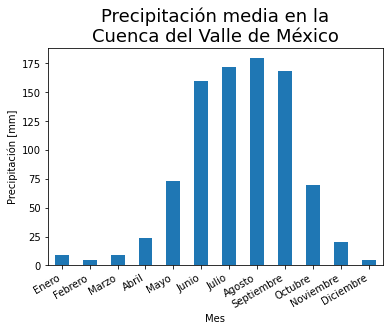

In [6]:
# Se grafica el promedio mensual.
pre_mes = pre_df.groupby(pre_df.index.month).mean()
pre_mes.rename_axis("Mes", axis = "index", inplace = True)
pre_mes.plot.bar(legend = None)

# Se configura la gráfica.
plt.xlabel("Mes")
plt.ylabel("Precipitación [mm]")
plt.title(
    "Precipitación media en la\nCuenca del Valle de México",
    {"fontsize": 18}
    )
plt.xticks(range(0,12), pre_df.Mes[0:12], rotation = 30, ha = "right")

# Se muesta la gráfica.
plt.show()

In [7]:
pre_mes

,pre
Mes,
1,8.873810
2,4.828175
3,8.670635
4,23.578571
5,73.112701
6,159.550003
7,171.698013
8,179.344849
9,168.662308


In [8]:
# Análisis de temporada de lluvias.
print("Precipitación total: " + str(pre_mes.sum()[0]))
print("Porcentaje de precipitación total de mayo a octubre: "
    + str(pre_mes.iloc[4:10].sum()[0] / pre_mes.sum()[0]))
print("Porcentaje de precipitación total de junio a septiembre: "
    + str(pre_mes.iloc[5:9].sum()[0] / pre_mes.sum()[0]))

Precipitación total: 893.33167
Porcentaje de precipitación total de mayo a octubre: 0.9198253
Porcentaje de precipitación total de junio a septiembre: 0.76036173
